In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample



pd.set_option('display.max_columns', 200)

# Loading Data
As there is a large amount of data in user_logs I will be limiting the number of rows in the loaded data 

In [2]:
train = pd.read_csv('./kkbox-churn-prediction-challenge/train.csv')
members = pd.read_csv('./kkbox-churn-prediction-challenge/members_V3.csv', nrows=10000000)
transactions = pd.read_csv('./kkbox-churn-prediction-challenge/transactions.csv', nrows=10000000)
user_logs = pd.read_csv('./kkbox-churn-prediction-challenge/user_logs.csv',nrows = 100000000)

#### Train Dataset

In [3]:
print(train.shape)
train.head()

(992931, 2)


,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992931 entries, 0 to 992930
Data columns (total 2 columns):
msno        992931 non-null object
is_churn    992931 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.2+ MB


0    0.936077
1    0.063923
Name: is_churn, dtype: float64


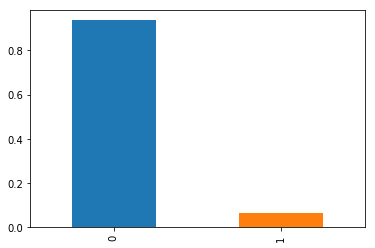

In [5]:
print(train.is_churn.value_counts(dropna=False,normalize=True))
train.is_churn.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [6]:
# low variance in churn data may have to resample

#### Member Dataset

In [7]:
print(members.shape)
members.head()

(6769473, 6)


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [8]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


NaN       65.433528
male      17.658022
female    16.908451
Name: gender, dtype: float64


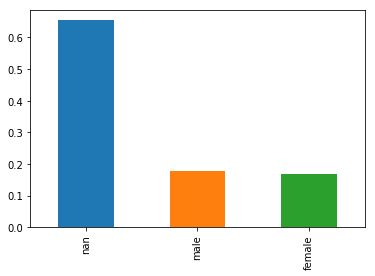

In [9]:
print(members.gender.value_counts(dropna=False,normalize=True)*100)
members.gender.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [10]:
# 60% of column gender is missing. This column can be dropped

In [11]:
members.drop(['gender'], axis=1, inplace = True)

1     70.970458
5      5.688316
13     4.741551
4      3.646488
22     3.108174
15     2.809864
6      1.997201
14     1.328612
12     0.987418
9      0.703733
11     0.701517
8      0.679152
18     0.561920
10     0.479831
21     0.455530
17     0.410254
3      0.403015
7      0.171505
16     0.075220
20     0.062531
19     0.017712
Name: city, dtype: float64


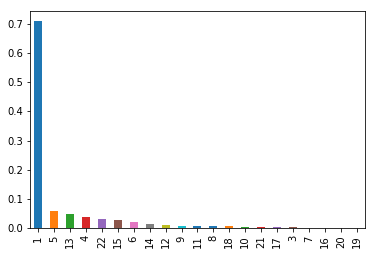

In [18]:
print(members.city.value_counts(dropna=False,normalize=True)*100)
members.city.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [24]:
  
def city_fixer(row):
    if row['city'] in [1,5,13,4,22,15] :
        return row['city']
    else:
        return 999
    


In [25]:
members['city']= members.apply (lambda row: city_fixer(row), axis=1)

1      70.970458
999     9.035149
5       5.688316
13      4.741551
4       3.646488
22      3.108174
15      2.809864
Name: city, dtype: float64


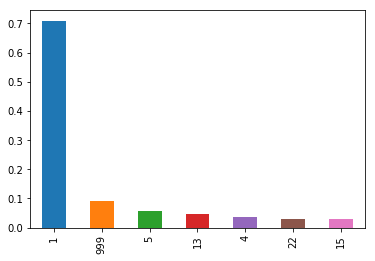

In [26]:
print(members.city.value_counts(dropna=False,normalize=True)*100)
members.city.value_counts(dropna=False,normalize=True).plot(kind='bar')

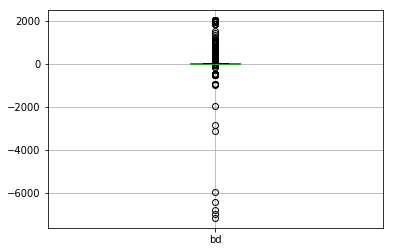

In [29]:
members.boxplot('bd')

In [12]:
# convert date column into date format
members['registration_init_time'] = pd.to_datetime(members['registration_init_time'], format='%Y%m%d')

In [13]:
# break date column in to parts for further analysis
members['registration_year'] = members.registration_init_time.dt.year
members['registration_month'] = members.registration_init_time.dt.month
members['registration_day'] = members.registration_init_time.dt.day
members['registration_weekday'] = members.registration_init_time.dt.weekday


In [14]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 9 columns):
msno                      object
city                      int64
bd                        int64
registered_via            int64
registration_init_time    datetime64[ns]
registration_year         int64
registration_month        int64
registration_day          int64
registration_weekday      int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 464.8+ MB


In [15]:
members.head()

,msno,city,bd,registered_via,registration_init_time,registration_year,registration_month,registration_day,registration_weekday
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,11,2011-09-11,2011,9,11,6
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,7,2011-09-14,2011,9,14,2
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,11,2011-09-15,2011,9,15,3
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,11,2011-09-15,2011,9,15,3
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,9,2011-09-15,2011,9,15,3


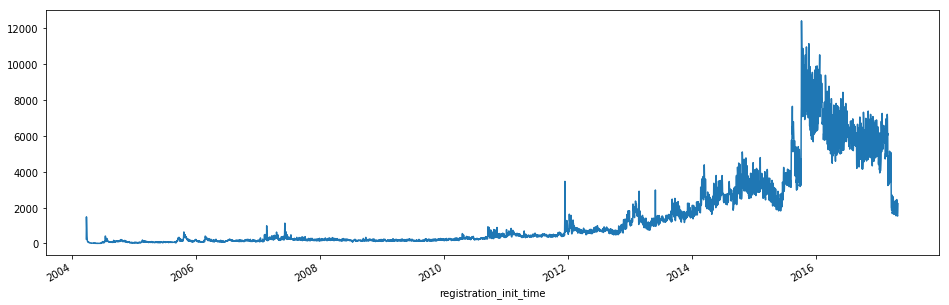

In [16]:
# graph count of members registration date over time
member_date = members.groupby('registration_init_time').registration_init_time.count()
ax = member_date.plot(figsize=(16, 5))

In [17]:
#fairly low numbers of registrations daily until around 2013 where member registration increases overall but
#erratically on a day to day basis

#### User Logs Data

In [ ]:
print(user_logs.shape)
user_logs.head()

In [ ]:
user_logs.info()

In [ ]:
user_logs['date'] = pd.to_datetime(user_logs['date'], format='%Y%m%d')
user_logs['weekday']= user_logs.date.dt.day_name()
user_logs['day_of_week']= user_logs.date.dt.weekday
user_logs['year']= user_logs.date.dt.year
user_logs['month']= user_logs.date.dt.month


In [ ]:
user_logs.head()

In [ ]:
# graph overall song use by date
gr=user_logs.groupby(pd.Grouper(key='date', freq='D')).mean()
gr.plot.line(y=['num_25','num_50','num_75','num_985','num_100'],figsize=(16, 5))

In [ ]:
# majority of songs listened to entirely 
# spike in listening around jun/jul 2015 otherwise overall listeneing habits are steady

In [ ]:
# graph overall song use by month
use_month = pd.DataFrame(user_logs.month.value_counts(dropna=False, normalize=True)).reset_index()
use_month  = use_month.sort_values(by=['index'])
use_month.rename(columns={'index':'month', 'month':'freq'}).plot(x='month', y='freq')


In [ ]:
# majority of songs listened to in  Jan/Feb, drops in midlle months of year and slowly increases towords end of year

In [ ]:
# graph overall song use by day
use_day = pd.DataFrame(user_logs.day_of_week.value_counts(dropna=False, normalize=True)).reset_index()
use_day  = use_day.sort_values(by=['index'])
use_day.rename(columns={'index':'day_of_week', 'day_of_week':'freq'}).plot(x='day_of_week', y='freq')

In [ ]:
# spike during end of week in listening drop on wednesday and saturdays

In [ ]:
# song history
user_logs['total_songs'] = user_logs['num_25']+user_logs['num_50']+user_logs['num_75']+user_logs['num_985']+user_logs['num_100']
user_logs['songs_repeated'] = user_logs['total_songs'] - user_logs['num_unq']


In [ ]:
# calculate how many days member listened to songs
days = user_logs.groupby('msno')['total_secs'].count().reset_index()
days.columns = ['msno', 'days_listened']
days.head()

In [ ]:
# drop date and merge data withrest of user log data
user_logs.drop(['date','day_of_week','year','month'], axis=1,inplace=True)
totals = user_logs.groupby('msno').sum().reset_index()
logs = totals.merge(days, how='inner', on='msno')


In [ ]:
logs.head()

In [ ]:
logs.shape

#### Transaction Data

In [ ]:
print(transactions.shape)
transactions.head()

In [ ]:
transactions.info()

In [ ]:
# convert date columns into date format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], format='%Y%m%d')
transactions['membership_expire_date'] = pd.to_datetime(transactions['membership_expire_date'], format='%Y%m%d')

In [ ]:
# Are there any differences between plan price and paid price? 
transactions['discount'] = transactions['plan_list_price'] - transactions['actual_amount_paid']
transactions['discount'].unique()

In [ ]:
# Are there any differences between plan price and paid price? 
def discounter_cal(row):
    if row['plan_list_price'] == 0 :
        return 0
    if row['actual_amount_paid'] == 0 :
        return 0
    else:
        return row['plan_list_price']-row['actual_amount_paid']


In [ ]:
transactions['price_diff']= transactions.apply (lambda row: discounter_cal(row), axis=1)

In [ ]:
transactions['price_diff'].unique()

In [ ]:
# 0 = price same, 1 = discount, 2 = paying more than price list
def is_discount(row):
    if row['price_diff'] == 0 :
        return 0
    if row['price_diff'] > 0 :
        return 1
    else:
        return 2


In [ ]:
# identify discounted membrships
transactions['discount'] = transactions.apply (lambda row: is_discount(row), axis=1)

In [ ]:
# discounted memberships proportions 
transactions.discount.value_counts(dropna=False,normalize=True)

In [ ]:
# discount = 2 is so small these members could potentially be dropped most likely erros in the data,
#wait and see for now


In [ ]:
# get latest transaction
max_transact = transactions.loc[transactions.groupby(['msno'])["transaction_date"].idxmax()]
max_transact.head()

In [ ]:
# checking max transact is there 
check_max = pd.DataFrame(max_transact.msno.value_counts())
check_max['msno'].unique()

In [ ]:
print(max_transact.shape)
max_transact.head()

In [ ]:
max_transact.discount.value_counts(dropna=False,normalize=True)


In [ ]:
max_transact=max_transact[max_transact.discount != 2]

In [ ]:
# is_cancel comparison
print(max_transact.is_cancel.value_counts(dropna=False,normalize=True)*100)
max_transact.is_cancel.value_counts(dropna=False,normalize=True).plot(kind='bar')


In [ ]:
max_transact.shape

# EDA After Merge

In [ ]:
df_member= pd.merge(left = train,right = members,how = 'inner',on=['msno'])
print(df_member.shape)
df_member.head()

In [ ]:
df_member.info()

In [ ]:
corr = df_member.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmin=-.6,vmax=.6, square=True)

In [ ]:
#no strong correllations to is_churn

In [ ]:
df_transact= pd.merge(left = train,right = max_transact,how = 'inner',on=['msno'])
print(df_transact.shape)
df_transact.head()

In [ ]:
df_transact.info()

In [ ]:
corr = df_transact.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmin=-.5,vmax=1, square=True)

In [ ]:
# strong negative correlation between is churn and is_auto_renew
# somewhat of a correlation between is churn and is cancel

In [ ]:
df_log= pd.merge(left = train,right = logs,how = 'inner',on=['msno'])
print(df_log.shape)
df_log.head()

In [ ]:
df_log.info()

In [ ]:
corr = df_log.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmin=-.3,vmax=1, square=True)

In [ ]:
# is_churn is not correltated with all log data

In [ ]:
# merge all
df= pd.merge(left = df_member,right = max_transact,how = 'inner',on=['msno'])
print(df.shape)
df.head()

df= pd.merge(left = df,right = logs,how = 'inner',on=['msno'])
print(df.shape)
df.head()


In [ ]:
df.info()

In [ ]:
df['membership_length'] = df['membership_expire_date']-df['registration_init_time']
df['membership_length'] = round(df['membership_length'].dt.days/365.25,2)
df.head()

In [ ]:
# recheck churn variance
print(df.is_churn.value_counts(dropna=False))
print()
print('percentage')
print(df.is_churn.value_counts(dropna=False,normalize=True)*100)
print()
df.is_churn.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [ ]:
# still low variance in churn data will have to resample

In [ ]:
#bootstrap is_churn=1
#data = df[df['is_churn']==1]
#boot = resample(data, replace=True, n_samples=500000, random_state=1)


In [ ]:
#data2= df[df['is_churn']==0]

In [ ]:
#df = data2.append(boot)
#df.reset_index(inplace=True)
#df.drop(['index'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
# recheck churn variance again
print(df.is_churn.value_counts(dropna=False))
print()
print('percentage')
print(df.is_churn.value_counts(dropna=False,normalize=True)*100)
print()
df.is_churn.value_counts(dropna=False,normalize=True).plot(kind='bar')

In [ ]:
df.describe().T

In [ ]:
# bd has outliers
# check membership_length

In [ ]:
df.boxplot(column='bd')

In [ ]:
# obvious outliers, is this age, year random numbers?
#dropping column
df.drop('bd', axis=1, inplace=True)

In [ ]:
cheker = df[df['membership_length']<0]
print(cheker.shape)
cheker.head()

In [ ]:
cheker['membership_expire_date'].unique()

In [ ]:
# corrupted data in membership_expire_date column affects 87 rows
#dropping corrupted data
df = df[df['membership_length']>0]
print(df.shape)
print(df.is_churn.value_counts(dropna=False, normalize=True))

In [ ]:
# correlation heatmap of final data
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (25,15))
sns.heatmap(corr, mask=mask, vmin=-.3,vmax=.9, square=True,annot=True, fmt=".1f")

In [ ]:
# churn has a correlation with is_auto_renew as suspected
# summarised user logs have no correlation with churn

# Train Test Split

In [ ]:
df.transaction_date.max()

In [ ]:
data_train= df[df.transaction_date < '2017-02-01 00:00:00']
data_test= df[df.transaction_date >= '2017-02-01 00:00:00']

In [ ]:
# drop date time columns
data_train.drop(['registration_init_time', 'transaction_date', 'membership_expire_date'], axis=1,
        inplace=True)
data_test.drop(['registration_init_time', 'transaction_date', 'membership_expire_date'], axis=1,
        inplace=True)

In [ ]:
cols = [c for c in data_train.columns if c not in ['is_churn','msno']]
X_train = data_train[cols]
y_train = data_train['is_churn']
X_test = data_test[cols]
y_test = data_test['is_churn']

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
X_train.head()

# Modelling

### KNN model

In [ ]:
#Import Library
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
#Predict Output
y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
print(accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
#log loss check
print(log_loss(y_test, y_pred))

### Kmeans Model

In [ ]:
#Import Library
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0).fit(X_train)
#Predict Output
y_pred2= k_means.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
print(accuracy_score(y_test, y_pred2))

In [ ]:
print(classification_report(y_test, y_pred2))

In [ ]:
#log loss check
print(log_loss(y_test, y_pred2))